# Pymaceuticals Inc.
---

### Analysis

- Looking at our summary statistics table, we can see that the lowest mean tumor volumes, lowest median tumor volumes, and the lowest variance in tumor volumes are associated with the Capomulin and Ramicane drug regimens. This suggests that these two drug regimens may be most effective at treating tumor volume, compared with the other drug regimens evaluated in the study. 

- As we look at box plots that show the distribution of the tumor volume for each of the four most promising treatments—Capomulin, Ramicane, Infubinol, and Ceftamin—we see that at the last timepoint for each mouse in the study, both Capomulin and Ramicane are associated with much lower tumor volumes than are Infubinol and Ceftamin. This reinforces our earlier observation that Capomulin and Ramicane appear to produce lower tumor volumes than the other drug regimens. 

- As we see in our scatterplot that plots mouse weight against average tumor volume, there seems to be a positive correlation between mouse weight and average tumor volume. This is reinforced when we calculate the statistical correlation between these two variables (0.84) and create a linear regression model. As mouse weight increases, tumor volume also increases, suggesting that mouse weight impacts tumor volume. In practice, this means it’s important to consider a mouse’s weight when assessing the effectiveness of a drug regimen; drug effectiveness should be measured in comparison to mice at similar weights. 

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

# alternative
# len(mousestudy_df["Mouse ID"].unique())

249

In [3]:
# Find the duplicates where ID Number and Timepoint pairs are duplicated 

duplicates = merged_df[merged_df.duplicated(["Mouse ID","Timepoint"])]["Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df = merged_df.loc[merged_df["Mouse ID"].isin(duplicates),:]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
duplicates_df.index

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# drop_list = [908,909,910,911,912,913,914,915,916,917,918,919,920]
merged_clean = merged_df.drop(duplicates_df.index)
merged_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
merged_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = merged_clean.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
tumor_median = merged_clean.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [10]:
tumor_std = merged_clean.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [11]:
tumor_sem = merged_clean.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [12]:
tumor_var = merged_clean.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

summ_stats_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Std. Dev.": tumor_std,
    "Tumor Volume Std. Err.": tumor_sem
})
summ_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line.

summ_stats_df_2 = merged_clean.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
summ_stats_df_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [15]:
merged_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


Text(0, 0.5, 'Number of Mice Tested')

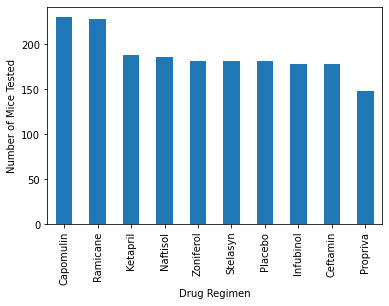

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_per_reg = merged_clean.groupby(["Drug Regimen"]).count()["Mouse ID"]

mice_per_reg = mice_per_reg.sort_values(ascending=False)

mice_chart_pandas = mice_per_reg.plot(kind="bar")
# mice_chart_pandas

mice_chart_pandas.set_ylabel("Number of Mice Tested")


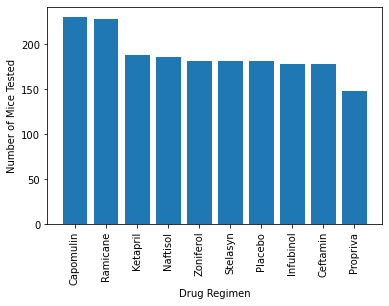

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice_chart_pyplot = plt.bar(mice_per_reg.index,mice_per_reg)

plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

Text(0, 0.5, 'Sex')

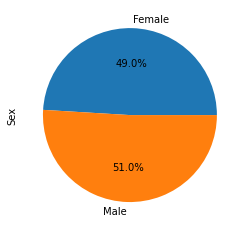

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

merged_clean_sex = merged_clean.groupby(["Sex"]).count()["Mouse ID"]
merged_clean_sex

merged_clean_sex.plot(kind="pie",y="Sex",autopct='%1.1f%%').set_ylabel("Sex")

# sex_pandas = merged_clean_sex.plot(kind="pie",y="Sex",autopct='%1.1f%%')

# sex_pandas.set_ylabel("Sex")


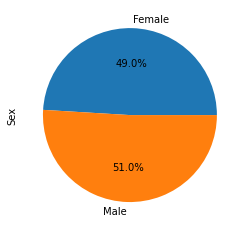

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mask_male = (merged_clean["Sex"]=="Male")
mask_female = (merged_clean["Sex"]=="Female")

male_mice = merged_clean.loc[mask_male,:].count()["Mouse ID"]
female_mice = merged_clean.loc[mask_female,:].count()["Mouse ID"]

sexes = ["Female","Male"]

number = [female_mice,male_mice]

plt.pie(number,labels=sexes,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
merged_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Start by getting the last (greatest) timepoint for each mouse

#for each drug and for each mouse, find the last timestamp 
merged_clean_grp = merged_clean.groupby(["Drug Regimen","Mouse ID"])
merged_clean_grp_max = merged_clean_grp.max()["Timepoint"]
merged_clean_grp_max = merged_clean_grp_max.reset_index()
merged_clean_grp_max

,Drug Regimen,Mouse ID,Timepoint
0,Capomulin,b128,45
1,Capomulin,b742,45
2,Capomulin,f966,20
3,Capomulin,g288,45
4,Capomulin,g316,45
...,...,...,...
243,Zoniferol,q633,45
244,Zoniferol,s337,45
245,Zoniferol,w140,5
246,Zoniferol,w575,45


In [22]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# need to merge on Mouse ID, Drug Regimen, Timepoint 

new_merge = pd.merge(merged_clean_grp_max,merged_clean,how="left",on=["Mouse ID","Timepoint"])
new_merge

,Drug Regimen_x,Mouse ID,Timepoint,Drug Regimen_y,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Capomulin,Female,9,22,38.982878,2
1,Capomulin,b742,45,Capomulin,Male,7,21,38.939633,0
2,Capomulin,f966,20,Capomulin,Male,16,17,30.485985,0
3,Capomulin,g288,45,Capomulin,Male,3,19,37.074024,1
4,Capomulin,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,Zoniferol,Male,12,25,70.827796,2
244,Zoniferol,s337,45,Zoniferol,Male,14,27,62.109651,4
245,Zoniferol,w140,5,Zoniferol,Female,19,30,47.717952,0
246,Zoniferol,w575,45,Zoniferol,Female,16,28,68.401286,3


In [23]:
new_merge.head()

,Drug Regimen_x,Mouse ID,Timepoint,Drug Regimen_y,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Capomulin,Female,9,22,38.982878,2
1,Capomulin,b742,45,Capomulin,Male,7,21,38.939633,0
2,Capomulin,f966,20,Capomulin,Male,16,17,30.485985,0
3,Capomulin,g288,45,Capomulin,Male,3,19,37.074024,1
4,Capomulin,g316,45,Capomulin,Female,22,22,40.159220,2


In [24]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tum_vol_list = []

potential_outliers = []

for drug in treatments: 
    final_tum_vol = new_merge.loc[new_merge["Drug Regimen_x"] == drug, "Tumor Volume (mm3)"]
    tum_vol_list.append(final_tum_vol)
#     print(f"{drug} list of tumor volumes: {tum_vol_list}")
    
    quartiles = final_tum_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(f"Lower Q for {drug} is {lowerq}")
#     print(f"Upper Q for {drug} is {upperq}")
#     print(f"IQR for {drug} is {iqr}")
#     print(f"Lower Bound for {drug} is {lower_bound}")
#     print(f"Uppder Bound for {drug} is {upper_bound}")
    
    outlier = final_tum_vol.loc[(final_tum_vol<lower_bound) | (final_tum_vol>upper_bound)]
    print(f"{drug}'s potential outliers: {outlier}")
  

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [25]:
tum_vol_list

[0     38.982878
 1     38.939633
 2     30.485985
 3     37.074024
 4     40.159220
 5     47.685963
 6     37.311846
 7     38.125164
 8     38.753265
 9     41.483008
 10    38.846876
 11    28.430964
 12    33.329098
 13    46.539206
 14    32.377357
 15    41.581521
 16    23.343598
 17    40.728578
 18    34.455298
 19    31.023923
 20    40.658124
 21    39.952347
 22    36.041047
 23    28.484033
 24    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 174    38.407618
 175    43.047543
 176    38.810366
 177    32.978522
 178    38.342008
 179    33.397653
 180    37.311236
 181    40.659006
 182    29.128472
 183    33.562402
 184    36.374510
 185    31.560470
 186    36.134852
 187    22.050126
 188    30.564625
 189    31.095335
 190    45.220869
 191    36.561652
 192    37.225650
 193    43.419381
 194    30.276232
 195    40.667713
 196    43.166373
 197    44.183451
 198    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 50    67.973419
 51    65.525743
 52  

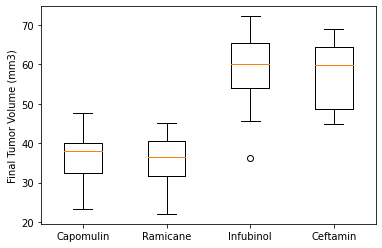

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tum_vol_list,labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# First, find a mouse ID that took Capomulin

find_a_mouse = merged_clean.groupby(["Drug Regimen","Mouse ID"]).count()
find_a_mouse

Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen Mouse ID                                           
Capomulin    b128       10          10          10         10   
             b742       10          10          10         10   
             f966        5           5           5          5   
             g288       10          10          10         10   
             g316       10          10          10         10   
...                    ...         ...         ...        ...   
Zoniferol    q633       10          10          10         10   
             s337       10          10          10         10   
             w140        2           2           2          2   
             w575       10          10          10         10   
             x613        4           4           4          4   

                       Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen Mouse ID                                        
Capomulin    b128                      10                10  
             b742                      10                10  
             f966                       5                 5  
             g288                      10                10  
             g316                      10                10  
...                                   ...               ...  
Zoniferol    q633                      10                10  
             s337                      10                10  
             w140                       2                 2  
             w575                      10                10  
             x613                       4                 4  

[248 rows x 6 columns]

In [28]:
# Get the data for that mouse:

mask_mouse = merged_clean["Mouse ID"] == "b128"
one_mouse = merged_clean.loc[mask_mouse,:]
one_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


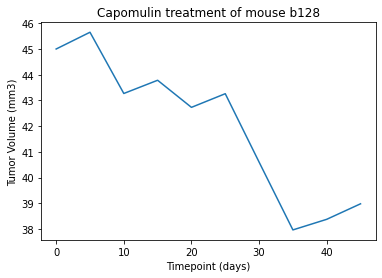

In [29]:
plt.plot((one_mouse["Timepoint"]),(one_mouse["Tumor Volume (mm3)"]))
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")
plt.show()

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_data = merged_clean.loc[merged_clean["Drug Regimen"] == "Capomulin",:]
cap_data_grp = cap_data.groupby(["Weight (g)","Mouse ID"]).mean()
cap_data_grp

Age_months  Timepoint  Tumor Volume (mm3)  \
Weight (g) Mouse ID                                              
15         x401            16.0       22.5           36.182040   
17         f966            16.0       10.0           36.505973   
           m601            22.0       22.5           34.847470   
           r554             8.0       22.5           36.509212   
           s185             3.0       22.5           34.559143   
           t565            20.0       22.5           39.328725   
           u364            18.0       22.5           39.887495   
           y793            17.0       22.5           38.506829   
19         g288             3.0       22.5           41.990097   
           l897            17.0       22.5           42.507261   
           m957             3.0       22.5           39.049816   
20         i738            23.0       22.5           39.141053   
21         b742             7.0       22.5           40.083699   
           j246            21.0       17.5           43.216925   
           l509            17.0       22.5           44.434474   
           v923            19.0       22.5           41.581595   
           w914            24.0       22.5           41.352452   
22         b128             9.0       22.5           41.963636   
           g316            22.0       22.5           44.613344   
23         j119             7.0       22.5           44.465236   
           s710             1.0       22.5           42.803733   
           w150            23.0        5.0           41.384825   
24         i557             1.0       22.5           44.805810   
25         r157            22.0        7.5           45.798970   
           r944            12.0       22.5           43.367364   

                     Metastatic Sites  
Weight (g) Mouse ID                    
15         x401                  0.00  
17         f966                  0.00  
           m601                  0.90  
           r554                  2.20  
           s185                  0.40  
           t565                  0.00  
           u364                  1.80  
           y793                  1.40  
19         g288                  0.80  
           l897                  0.40  
           m957                  0.90  
20         i738                  0.60  
21         b742                  0.00  
           j246                  0.25  
           l509                  1.40  
           v923                  0.90  
           w914                  0.50  
22         b128                  0.70  
           g316                  1.00  
23         j119                  0.60  
           s710                  0.60  
           w150                  0.00  
24         i557                  0.20  
25         r157                  0.00  
           r944                  0.90

In [31]:
cap_weight = cap_data_grp.index.get_level_values(0)
cap_weight

Int64Index([15, 17, 17, 17, 17, 17, 17, 17, 19, 19, 19, 20, 21, 21, 21, 21, 21,
            22, 22, 23, 23, 23, 24, 25, 25],
           dtype='int64', name='Weight (g)')

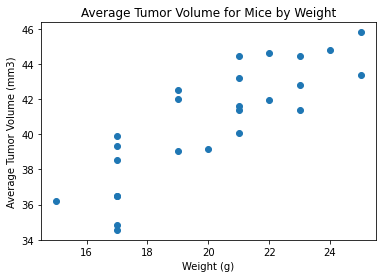

In [32]:
plt.scatter(cap_weight,cap_data_grp["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume for Mice by Weight")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


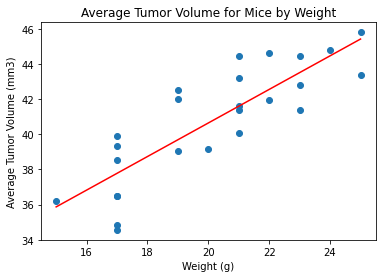

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = cap_weight
y_values = cap_data_grp["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume for Mice by Weight")
correlation = st.pearsonr(x_values,y_values)
correlation = round(correlation[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
plt.show()